# Base and res spec h-bond

## CGC

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv
import os

input_files = os.path.join('DNMT3A_inputs')

cgc=pd.read_csv(input_files+"/3A-CGC.int.hbonds", sep="\t", header=None)
cgc.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cgc['resid_a'] = cgc['resid_a'] + 629

cgc_inter = cgc.loc[((cgc["chain_a"] == "A") & (cgc["chain_b"] == "B")) | 
                    ((cgc["chain_a"] == "A") & (cgc["chain_b"] == "C")) ]

cgc_spec = cgc_inter.drop(cgc_inter.index[cgc_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cgc_spec_res = cgc_spec.drop(cgc_spec.index[cgc_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cgc_spec_res["resname_a"] = cgc_spec_res["resname_a"].astype(str) + cgc_spec_res["resid_a"].astype(str)
#
cgc_spec_res=cgc_spec_res.drop(columns=['resid_a'])
cgc_spec_res['Type'] = '3A:CGC'
#
cgc_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
77,hbond,A,B,ARG720,DC,290,NH1,O2,3A:CGC
79,hbond,A,B,ARG720,DC,290,NH2,O2,3A:CGC
173,hbond,A,B,ARG836,DG,287,NE,O6,3A:CGC
174,hbond,A,B,ARG836,DG,287,NH2,N7,3A:CGC
259,hbond,A,C,GLU756,DC,298,OE1,N4,3A:CGC
...,...,...,...,...,...,...,...,...,...
839123,hbond,A,C,ARG790,DC,298,NE,O2,3A:CGC
839125,hbond,A,C,ARG790,DC,298,NH2,N3,3A:CGC
839166,hbond,A,B,ARG836,DG,287,NE,O6,3A:CGC
839167,hbond,A,B,ARG836,DG,287,NH2,N7,3A:CGC


In [3]:
#Function for convert residue number of nucleotides to nucleotide position
def nucleotide_pos(df):
    df['resid_b'] = df['resid_b'].astype(str).str.replace('284',"(+5')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('285',"(+4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('286',"(+3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('287',"(+2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('288',"(+1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('289',"(0')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('290',"(-1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('291',"(-2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('292',"(-3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('293',"(-4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('294',"(-4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('295',"(-3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('296',"(-2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('297',"(-1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('298',"(0)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('299',"(+1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('300',"(+2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('301',"(+3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('302',"(+4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('303',"(+5)")


In [4]:
nucleotide_pos(cgc_spec_res)
cgc_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
77,hbond,A,B,ARG720,DC,(-1'),NH1,O2,3A:CGC
79,hbond,A,B,ARG720,DC,(-1'),NH2,O2,3A:CGC
173,hbond,A,B,ARG836,DG,(+2'),NE,O6,3A:CGC
174,hbond,A,B,ARG836,DG,(+2'),NH2,N7,3A:CGC
259,hbond,A,C,GLU756,DC,(0),OE1,N4,3A:CGC
...,...,...,...,...,...,...,...,...,...
839123,hbond,A,C,ARG790,DC,(0),NE,O2,3A:CGC
839125,hbond,A,C,ARG790,DC,(0),NH2,N3,3A:CGC
839166,hbond,A,B,ARG836,DG,(+2'),NE,O6,3A:CGC
839167,hbond,A,B,ARG836,DG,(+2'),NH2,N7,3A:CGC


In [5]:
cgc_spec_res['resname_a'] = cgc_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cgc_spec_res=cgc_spec_res.drop(cgc_spec_res.loc[cgc_spec_res['resid_b']=="(0)"].index)
#
cgc_spec_res['pairwise'] = cgc_spec_res['resname_a'].str.cat(cgc_spec_res['resid_b'],sep="-")
cgc_spec_res['pair_freq'] = cgc_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cgc_spec_res['atom_atom'] = cgc_spec_res['resname_a']+"-"+ cgc_spec_res['atom_a']+"-"+ cgc_spec_res['resid_b'] +"-"+ cgc_spec_res['atom_b']
cgc_spec_res['atom_atom_freq'] = cgc_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cgc_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
77,hbond,A,B,Arg720,DC,(-1'),NH1,O2,3A:CGC,Arg720-(-1'),5463,Arg720-NH1-(-1')-O2,2329
79,hbond,A,B,Arg720,DC,(-1'),NH2,O2,3A:CGC,Arg720-(-1'),5463,Arg720-NH2-(-1')-O2,3133
173,hbond,A,B,Arg836,DG,(+2'),NE,O6,3A:CGC,Arg836-(+2'),6141,Arg836-NE-(+2')-O6,2479
174,hbond,A,B,Arg836,DG,(+2'),NH2,N7,3A:CGC,Arg836-(+2'),6141,Arg836-NH2-(+2')-N7,2382
348,hbond,A,B,Arg720,DC,(-1'),NH1,O2,3A:CGC,Arg720-(-1'),5463,Arg720-NH1-(-1')-O2,2329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838896,hbond,A,B,Arg836,DG,(+2'),NH2,N7,3A:CGC,Arg836-(+2'),6141,Arg836-NH2-(+2')-N7,2382
839066,hbond,A,B,Arg720,DA,(-2'),NH2,N9,3A:CGC,Arg720-(-2'),215,Arg720-NH2-(-2')-N9,192
839067,hbond,A,B,Arg720,DC,(-1'),NH2,O2,3A:CGC,Arg720-(-1'),5463,Arg720-NH2-(-1')-O2,3133
839166,hbond,A,B,Arg836,DG,(+2'),NE,O6,3A:CGC,Arg836-(+2'),6141,Arg836-NE-(+2')-O6,2479


In [6]:
import warnings
warnings.filterwarnings('ignore')

cgc_compl = cgc_spec_res[cgc_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cgc_compl['Strand'] = 'CGC-compl'

cgc_target = cgc_spec_res[cgc_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cgc_target['Strand'] = 'CGC-target'

cgc_all=cgc_compl.append(cgc_target)
cgc_all=cgc_all.sort_values(('atom_atom_freq') , ascending=False)
cgc_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
173,hbond,A,B,Arg836,DG,(+2'),NE,O6,3A:CGC,Arg836-(+2'),6141,Arg836-NE-(+2')-O6,2479,CGC-compl
614092,hbond,A,B,Arg836,DG,(+2'),NE,O6,3A:CGC,Arg836-(+2'),6141,Arg836-NE-(+2')-O6,2479,CGC-compl
338495,hbond,A,B,Arg836,DG,(+2'),NE,O6,3A:CGC,Arg836-(+2'),6141,Arg836-NE-(+2')-O6,2479,CGC-compl
338762,hbond,A,B,Arg836,DG,(+2'),NE,O6,3A:CGC,Arg836-(+2'),6141,Arg836-NE-(+2')-O6,2479,CGC-compl
614862,hbond,A,B,Arg836,DG,(+2'),NE,O6,3A:CGC,Arg836-(+2'),6141,Arg836-NE-(+2')-O6,2479,CGC-compl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690516,hbond,A,C,Asn717,DG,(+1),ND2,N3,3A:CGC,Asn717-(+1),19,Asn717-ND2-(+1)-N3,2,CGC-target
673210,hbond,A,B,Ser837,DA,(+3'),OG,N6,3A:CGC,Ser837-(+3'),13,Ser837-OG-(+3')-N6,2,CGC-compl
673753,hbond,A,B,Ser837,DA,(+3'),OG,N6,3A:CGC,Ser837-(+3'),13,Ser837-OG-(+3')-N6,2,CGC-compl
705890,hbond,A,C,Asn717,DG,(+1),ND2,N2,3A:CGC,Asn717-(+1),19,Asn717-ND2-(+1)-N2,1,CGC-target


In [7]:
cgc_sig = cgc_all[cgc_all['atom_atom_freq'] > (3204*0.10)] 

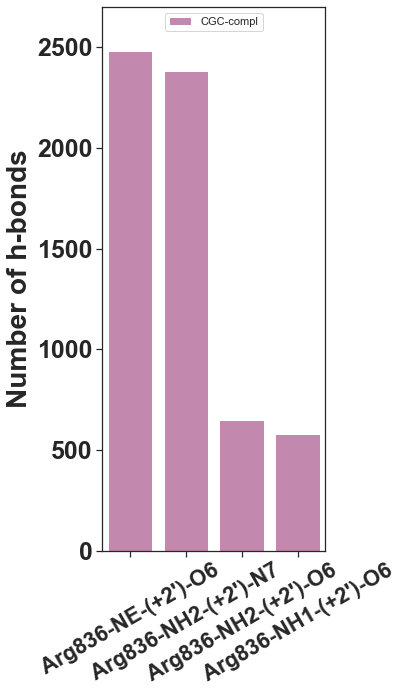

In [8]:
sns.set(style="ticks")
palet=['#cc7eb0', '#C71585']

plt.figure(figsize=(4,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 data=cgc_sig)

plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.ylim(ymax = 2700, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Number of h-bonds',fontsize=28, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3a-cgc-atom-atom-c-flank-a.pdf", dpi=600, bbox_inches='tight', format="pdf")


## CGG

In [9]:
cgg=pd.read_csv(input_files+"/3A-CGG.int.hbonds", sep="\t", header=None)
cgg.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cgg['resid_a'] = cgg['resid_a'] + 629

cgg_inter = cgg.loc[((cgg["chain_a"] == "A") & (cgg["chain_b"] == "B")) | 
                    ((cgg["chain_a"] == "A") & (cgg["chain_b"] == "C")) ]

cgg_spec = cgg_inter.drop(cgg_inter.index[cgg_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cgg_spec_res = cgg_spec.drop(cgg_spec.index[cgg_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cgg_spec_res["resname_a"] = cgg_spec_res["resname_a"].astype(str) + cgg_spec_res["resid_a"].astype(str)
#
cgg_spec_res=cgg_spec_res.drop(columns=['resid_a'])
cgg_spec_res['Type'] = '3A:CGG'
#
nucleotide_pos(cgg_spec_res)
cgg_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
75,hbond,A,C,ASN717,DG,(+1),ND2,N3,3A:CGG
132,hbond,A,C,ARG790,DC,(0),NH1,O2,3A:CGG
171,hbond,A,C,ARG836,DT,(+3),NH1,O4,3A:CGG
172,hbond,A,B,ARG836,DG,(+4'),NH2,N7,3A:CGG
173,hbond,A,C,ARG836,DT,(+3),NH2,O4,3A:CGG
...,...,...,...,...,...,...,...,...,...
836000,hbond,A,C,GLU756,DC,(0),OE2,N4,3A:CGG
836144,hbond,A,C,ARG792,DC,(0),NH1,N3,3A:CGG
836145,hbond,A,C,ARG792,DC,(0),NH2,O2,3A:CGG
836244,hbond,A,B,ASN838,DC,(+2'),OD1,N4,3A:CGG


In [10]:
cgg_spec_res['resname_a'] = cgg_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cgg_spec_res=cgg_spec_res.drop(cgg_spec_res.loc[cgg_spec_res['resid_b']=="(0)"].index)
#
cgg_spec_res['pairwise'] = cgg_spec_res['resname_a'].str.cat(cgg_spec_res['resid_b'],sep="-")
cgg_spec_res['pair_freq'] = cgg_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cgg_spec_res['atom_atom'] = cgg_spec_res['resname_a']+"-"+ cgg_spec_res['atom_a']+"-"+ cgg_spec_res['resid_b'] +"-"+ cgg_spec_res['atom_b']
cgg_spec_res['atom_atom_freq'] = cgg_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cgg_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
75,hbond,A,C,Asn717,DG,(+1),ND2,N3,3A:CGG,Asn717-(+1),79,Asn717-ND2-(+1)-N3,46
171,hbond,A,C,Arg836,DT,(+3),NH1,O4,3A:CGG,Arg836-(+3),222,Arg836-NH1-(+3)-O4,143
172,hbond,A,B,Arg836,DG,(+4'),NH2,N7,3A:CGG,Arg836-(+4'),179,Arg836-NH2-(+4')-N7,37
173,hbond,A,C,Arg836,DT,(+3),NH2,O4,3A:CGG,Arg836-(+3),222,Arg836-NH2-(+3)-O4,69
346,hbond,A,C,Asn717,DG,(+1),ND2,N3,3A:CGG,Asn717-(+1),79,Asn717-ND2-(+1)-N3,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835220,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245
835478,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245
835740,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245
835990,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245


In [11]:
cgg_compl = cgg_spec_res[cgg_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cgg_compl['Strand'] = 'cgg-compl'

cgg_target = cgg_spec_res[cgg_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cgg_target['Strand'] = 'cgg-target'

cgg_all=cgg_compl.append(cgg_target)
cgg_all=cgg_all.sort_values(('atom_atom_freq') , ascending=False)
cgg_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
509,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245,cgg-compl
573874,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245,cgg-compl
571794,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245,cgg-compl
215381,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245,cgg-compl
572062,hbond,A,B,Asn838,DC,(+2'),OD1,N4,3A:CGG,Asn838-(+2'),1523,Asn838-OD1-(+2')-N4,1245,cgg-compl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753335,hbond,A,C,Lys844,DG,(+1),NZ,N7,3A:CGG,Lys844-(+1),2,Lys844-NZ-(+1)-N7,1,cgg-target
753334,hbond,A,C,Lys844,DG,(+1),NZ,O6,3A:CGG,Lys844-(+1),2,Lys844-NZ-(+1)-O6,1,cgg-target
423306,hbond,A,B,Arg836,DC,(+1'),NH2,N4,3A:CGG,Arg836-(+1'),11,Arg836-NH2-(+1')-N4,1,cgg-compl
161661,hbond,A,C,Asn838,DG,(+2),ND2,N7,3A:CGG,Asn838-(+2),30,Asn838-ND2-(+2)-N7,1,cgg-target


In [12]:
cgg_sig = cgg_all[cgg_all['atom_atom_freq'] > (3204*0.10)] 

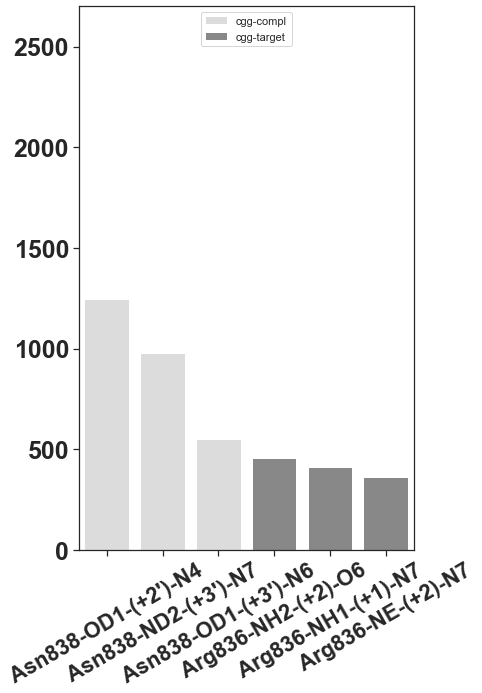

In [13]:
palet=['#DCDCDC', '#888888']

plt.figure(figsize=(6,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 dodge=False,
                 data=cgg_sig)
plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.ylim(ymax = 2700, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('',fontsize=15, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3a-cgg-atom-atom-c-flank-a.pdf", dpi=600, bbox_inches='tight', format="pdf")


## CGT

In [14]:
cgt=pd.read_csv(input_files+"/3A-CGT.int.hbonds", sep="\t", header=None)
cgt.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cgt['resid_a'] = cgt['resid_a'] + 629

cgt_inter = cgt.loc[((cgt["chain_a"] == "A") & (cgt["chain_b"] == "B")) | 
                    ((cgt["chain_a"] == "A") & (cgt["chain_b"] == "C")) ]

cgt_spec = cgt_inter.drop(cgt_inter.index[cgt_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cgt_spec_res = cgt_spec.drop(cgt_spec.index[cgt_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cgt_spec_res["resname_a"] = cgt_spec_res["resname_a"].astype(str) + cgt_spec_res["resid_a"].astype(str)
#
cgt_spec_res=cgt_spec_res.drop(columns=['resid_a'])
cgt_spec_res['Type'] = '3A:CGT'
#
nucleotide_pos(cgt_spec_res)
cgt_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
76,hbond,A,B,ARG720,DA,(-2'),NH2,N3,3A:CGT
77,hbond,A,B,ARG720,DC,(-1'),NH2,O2,3A:CGT
133,hbond,A,C,ARG790,DC,(0),NH1,O2,3A:CGT
134,hbond,A,C,ARG790,DC,(0),NH2,N3,3A:CGT
135,hbond,A,C,ARG790,DC,(0),NH2,O2,3A:CGT
...,...,...,...,...,...,...,...,...,...
837461,hbond,A,C,GLU756,DC,(0),OE1,N4,3A:CGT
837638,hbond,A,B,LYS844,DG,(0'),NZ,N7,3A:CGT
837639,hbond,A,C,LYS844,DG,(-1),NZ,O6,3A:CGT
837803,hbond,A,B,ARG720,DC,(-1'),NH1,O2,3A:CGT


In [15]:
cgt_spec_res['resname_a'] = cgt_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cgt_spec_res=cgt_spec_res.drop(cgt_spec_res.loc[cgt_spec_res['resid_b']=="(0)"].index)
#
cgt_spec_res['pairwise'] = cgt_spec_res['resname_a'].str.cat(cgt_spec_res['resid_b'],sep="-")
cgt_spec_res['pair_freq'] = cgt_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cgt_spec_res['atom_atom'] = cgt_spec_res['resname_a']+"-"+ cgt_spec_res['atom_a']+"-"+ cgt_spec_res['resid_b'] +"-"+ cgt_spec_res['atom_b']
cgt_spec_res['atom_atom_freq'] = cgt_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cgt_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
76,hbond,A,B,Arg720,DA,(-2'),NH2,N3,3A:CGT,Arg720-(-2'),777,Arg720-NH2-(-2')-N3,122
77,hbond,A,B,Arg720,DC,(-1'),NH2,O2,3A:CGT,Arg720-(-1'),4976,Arg720-NH2-(-1')-O2,3039
171,hbond,A,C,Arg836,DG,(+1),NE,O6,3A:CGT,Arg836-(+1),2221,Arg836-NE-(+1)-O6,392
173,hbond,A,C,Arg836,DG,(+1),NH2,O6,3A:CGT,Arg836-(+1),2221,Arg836-NH2-(+1)-O6,427
342,hbond,A,B,Arg720,DC,(-1'),NH2,O2,3A:CGT,Arg720-(-1'),4976,Arg720-NH2-(-1')-O2,3039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
837444,hbond,A,B,Ser837,DA,(+3'),OG,N6,3A:CGT,Ser837-(+3'),381,Ser837-OG-(+3')-N6,227
837638,hbond,A,B,Lys844,DG,(0'),NZ,N7,3A:CGT,Lys844-(0'),324,Lys844-NZ-(0')-N7,55
837639,hbond,A,C,Lys844,DG,(-1),NZ,O6,3A:CGT,Lys844-(-1),368,Lys844-NZ-(-1)-O6,334
837803,hbond,A,B,Arg720,DC,(-1'),NH1,O2,3A:CGT,Arg720-(-1'),4976,Arg720-NH1-(-1')-O2,1937


In [16]:
cgt_compl = cgt_spec_res[cgt_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cgt_compl['Strand'] = 'cgt-compl'

cgt_target = cgt_spec_res[cgt_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cgt_target['Strand'] = 'cgt-target'

cgt_all=cgt_compl.append(cgt_target)
cgt_all=cgt_all.sort_values(('atom_atom_freq') , ascending=False)
cgt_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
158680,hbond,A,C,Arg836,DG,(+1),NH1,O6,3A:CGT,Arg836-(+1),2221,Arg836-NH1-(+1)-O6,544,cgt-target
96509,hbond,A,C,Arg836,DG,(+1),NH1,O6,3A:CGT,Arg836-(+1),2221,Arg836-NH1-(+1)-O6,544,cgt-target
72224,hbond,A,C,Arg836,DG,(+1),NH1,O6,3A:CGT,Arg836-(+1),2221,Arg836-NH1-(+1)-O6,544,cgt-target
72489,hbond,A,C,Arg836,DG,(+1),NH1,O6,3A:CGT,Arg836-(+1),2221,Arg836-NH1-(+1)-O6,544,cgt-target
72752,hbond,A,C,Arg836,DG,(+1),NH1,O6,3A:CGT,Arg836-(+1),2221,Arg836-NH1-(+1)-O6,544,cgt-target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85419,hbond,A,B,Lys844,DC,(+1'),NZ,N4,3A:CGT,Lys844-(+1'),3,Lys844-NZ-(+1')-N4,3,cgt-compl
436505,hbond,A,B,Arg836,DC,(+1'),NE,N4,3A:CGT,Arg836-(+1'),25,Arg836-NE-(+1')-N4,2,cgt-compl
440598,hbond,A,B,Arg836,DC,(+1'),NE,N4,3A:CGT,Arg836-(+1'),25,Arg836-NE-(+1')-N4,2,cgt-compl
418252,hbond,A,B,Arg836,DA,(+2'),NH1,N7,3A:CGT,Arg836-(+2'),62,Arg836-NH1-(+2')-N7,1,cgt-compl


In [17]:
cgt_sig = cgt_all[cgt_all['atom_atom_freq'] > (3204*0.10)]

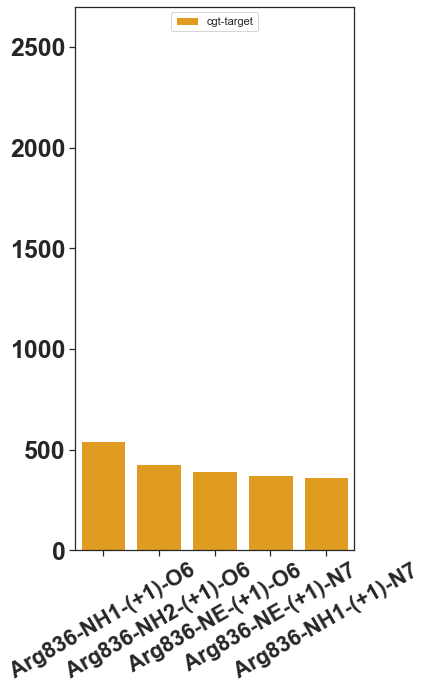

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv

palet=['orange', '#FFD491']
#palet=['orange']

plt.figure(figsize=(5,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 dodge=False,
                 data=cgt_sig)
plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.ylim(ymax = 2700, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('',fontsize=15, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3a-cgt-atom-atom-c-flank-a.pdf", dpi=600, bbox_inches='tight', format="pdf")


## CGA

In [19]:
cga=pd.read_csv(input_files+"/3A-CGA.int.hbonds", sep="\t", header=None)
cga.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cga['resid_a'] = cga['resid_a'] + 629

cga_inter = cga.loc[((cga["chain_a"] == "A") & (cga["chain_b"] == "B")) | 
                    ((cga["chain_a"] == "A") & (cga["chain_b"] == "C")) ]

cga_spec = cga_inter.drop(cga_inter.index[cga_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cga_spec_res = cga_spec.drop(cga_spec.index[cga_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cga_spec_res["resname_a"] = cga_spec_res["resname_a"].astype(str) + cga_spec_res["resid_a"].astype(str)
#
cga_spec_res=cga_spec_res.drop(columns=['resid_a'])
cga_spec_res['Type'] = '3A:CGA'
#
nucleotide_pos(cga_spec_res)
cga_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
81,hbond,A,B,ARG720,DC,(-1'),NH1,O2,3A:CGA
83,hbond,A,B,ARG720,DC,(-1'),NH2,O2,3A:CGA
136,hbond,A,C,ARG790,DC,(0),NH2,O2,3A:CGA
172,hbond,A,B,ARG836,DT,(+2'),NE,O4,3A:CGA
173,hbond,A,C,ARG836,DG,(+1),NH1,N7,3A:CGA
...,...,...,...,...,...,...,...,...,...
834699,hbond,A,B,LYS844,DG,(0'),NZ,O6,3A:CGA
834772,hbond,A,C,GLU756,DC,(0),OE2,N4,3A:CGA
834945,hbond,A,B,ARG836,DT,(+2'),NH1,O4,3A:CGA
835020,hbond,A,C,GLU756,DC,(0),OE1,N4,3A:CGA


In [20]:
cga_spec_res['resname_a'] = cga_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cga_spec_res=cga_spec_res.drop(cga_spec_res.loc[cga_spec_res['resid_b']=="(0)"].index)
#
cga_spec_res['pairwise'] = cga_spec_res['resname_a'].str.cat(cga_spec_res['resid_b'],sep="-")
cga_spec_res['pair_freq'] = cga_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cga_spec_res['atom_atom'] = cga_spec_res['resname_a']+"-"+ cga_spec_res['atom_a']+"-"+ cga_spec_res['resid_b'] +"-"+ cga_spec_res['atom_b']
cga_spec_res['atom_atom_freq'] = cga_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cga_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
81,hbond,A,B,Arg720,DC,(-1'),NH1,O2,3A:CGA,Arg720-(-1'),3821,Arg720-NH1-(-1')-O2,1618
83,hbond,A,B,Arg720,DC,(-1'),NH2,O2,3A:CGA,Arg720-(-1'),3821,Arg720-NH2-(-1')-O2,2203
172,hbond,A,B,Arg836,DT,(+2'),NE,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NE-(+2')-O4,67
173,hbond,A,C,Arg836,DG,(+1),NH1,N7,3A:CGA,Arg836-(+1),569,Arg836-NH1-(+1)-N7,134
348,hbond,A,B,Arg720,DC,(-1'),NH1,O2,3A:CGA,Arg720-(-1'),3821,Arg720-NH1-(-1')-O2,1618
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834182,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622
834433,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622
834691,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622
834699,hbond,A,B,Lys844,DG,(0'),NZ,O6,3A:CGA,Lys844-(0'),234,Lys844-NZ-(0')-O6,228


In [21]:
cga_compl = cga_spec_res[cga_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cga_compl['Strand'] = 'cga-compl'

cga_target = cga_spec_res[cga_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cga_target['Strand'] = 'cga-target'

cga_all=cga_compl.append(cga_target)
cga_all=cga_all.sort_values(('atom_atom_freq') , ascending=False)
cga_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
504392,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622,cga-compl
559912,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622,cga-compl
542574,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622,cga-compl
542836,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622,cga-compl
543087,hbond,A,B,Arg836,DT,(+2'),NH1,O4,3A:CGA,Arg836-(+2'),2703,Arg836-NH1-(+2')-O4,2622,cga-compl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12188,hbond,A,B,Asn838,DA,(+3'),ND2,N6,3A:CGA,Asn838-(+3'),102,Asn838-ND2-(+3')-N6,4,cga-compl
12960,hbond,A,B,Asn838,DA,(+3'),ND2,N6,3A:CGA,Asn838-(+3'),102,Asn838-ND2-(+3')-N6,4,cga-compl
28644,hbond,A,B,Asn838,DA,(+3'),ND2,N6,3A:CGA,Asn838-(+3'),102,Asn838-ND2-(+3')-N6,4,cga-compl
615269,hbond,A,C,Arg887,DT,(+3),NE,O4,3A:CGA,Arg887-(+3),8,Arg887-NE-(+3)-O4,1,cga-target


In [22]:
cga_sig = cga_all[cga_all['atom_atom_freq'] > (3204*0.10)] 

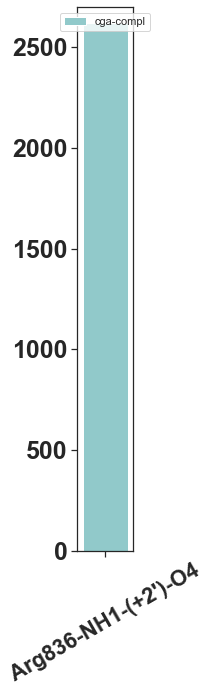

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv

#palet=['#C71585','#DCDCDC', 'orange', 'lightseagreen']
palet=['#87D3D3','lightseagreen']

plt.figure(figsize=(1,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 dodge=False,
                 data=cga_sig)
plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.ylim(ymax = 2700, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('',fontsize=15, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3a-cga-atom-atom-c-flank-a.pdf", dpi=600, bbox_inches='tight', format="pdf")
